# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

### My hypotheses
1. Married applicant more likely to get loan? Married individual would have more total income than single applicant (is this related to co-applicant?)
2. lower loan amounts more likely to be accepted? easier to pay back
3. lower amount of dependents more likely to be accepted, more dependent would impact usuable income
4. lower loan amount/loan term ratio would also be more likely to be accepted? easier to pay off as well

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

df = pd.read_csv("./data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [3]:
df.shape

(614, 13)

In [2]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Look at some basic statistics for numerical variables.

In [15]:
numerical = df.dtypes[df.dtypes != 'object' ].index.tolist()

In [17]:
df[numerical].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [18]:
# 1
df['Credit_History'].value_counts()  # class imbalance

1.0    475
0.0     89
Name: Credit_History, dtype: int64

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [34]:
categorical = df.dtypes[df.dtypes == 'object'].index.tolist() # Loan_ID and Dependents are not to be included?
categorical.remove('Loan_ID')

In [35]:
df[categorical].head() 

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [43]:
for i in df[categorical]:
    print(f' {i}: {df[i].unique()}')

 Gender: ['Male' 'Female' nan]
 Married: ['No' 'Yes' nan]
 Dependents: ['0' '1' '2' '3+' nan]
 Education: ['Graduate' 'Not Graduate']
 Self_Employed: ['No' 'Yes' nan]
 Property_Area: ['Urban' 'Rural' 'Semiurban']
 Loan_Status: ['Y' 'N']


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [44]:
for i in df[categorical]:
    print(df[i].value_counts(), '\n')

Male      489
Female    112
Name: Gender, dtype: int64 

Yes    398
No     213
Name: Married, dtype: int64 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

No     500
Yes     82
Name: Self_Employed, dtype: int64 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 

Y    422
N    192
Name: Loan_Status, dtype: int64 



### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



bins=5


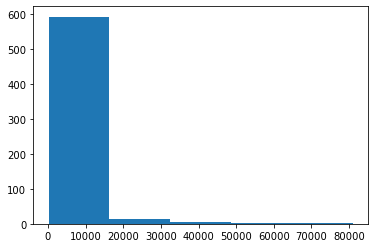

bins=10


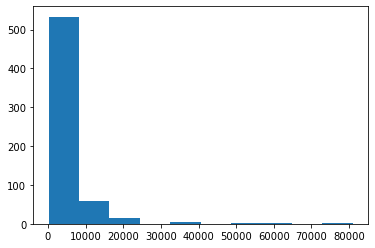

bins=20


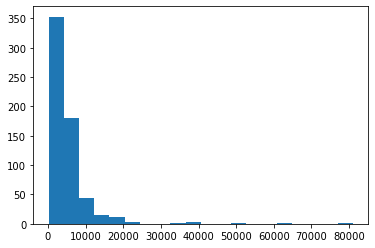

bins=30


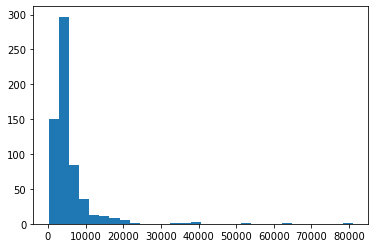

bins=50


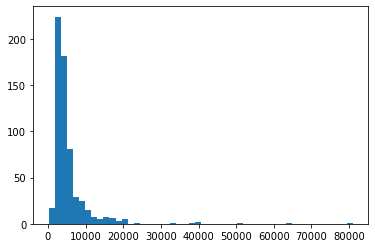

In [71]:
# 2, Applicant Income
for num in [5,10,20,30,50]:
    print(f'bins={num}')
    plt.hist(df['ApplicantIncome'], bins=num)
    plt.show()

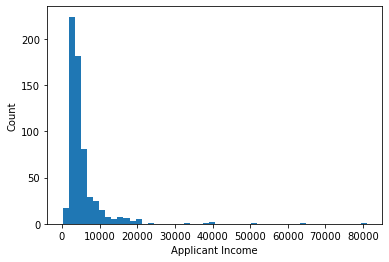

In [83]:
# the best number of bins in my opnion
plt.hist(df['ApplicantIncome'], bins=50)
plt.xlabel('Applicant Income')
plt.ylabel('Count')
plt.show()

bins=5


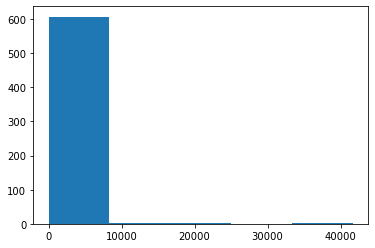

bins=10


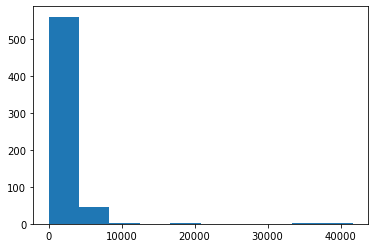

bins=20


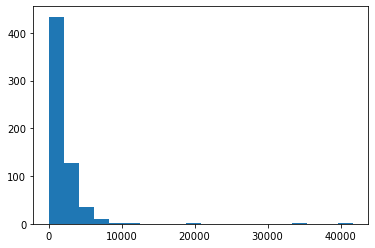

bins=30


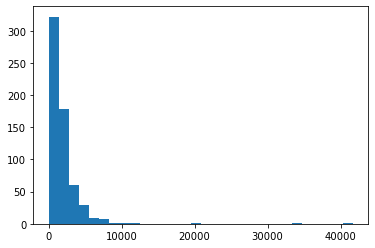

bins=50


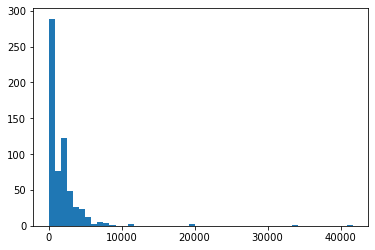

In [58]:
# 2, Coapplicant Income
for num in [5,10,20,30,50]:
    print(f'bins={num}')
    plt.hist(df['CoapplicantIncome'], bins=num)
    plt.show()

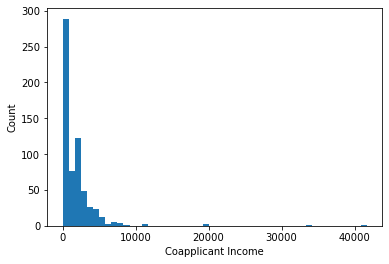

In [82]:
plt.hist(df['CoapplicantIncome'], bins=50)
plt.xlabel('Coapplicant Income')
plt.ylabel('Count')
plt.show()

Both ApplicantIncome and CoapplicantIncome are very right skewed


Look at box plots to understand the distributions. 

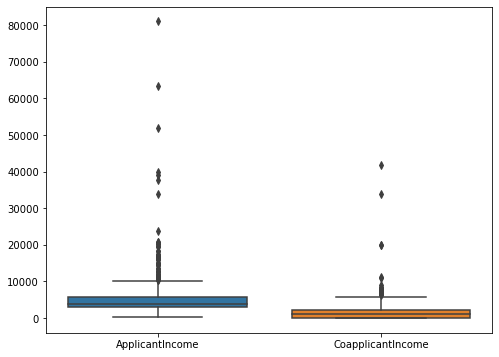

In [70]:
data = df[['ApplicantIncome', 'CoapplicantIncome']]
f, ax = plt.subplots(figsize=(8,6))
ax = sns.boxplot(data=data)

Look at the distribution of income segregated  by `Education`

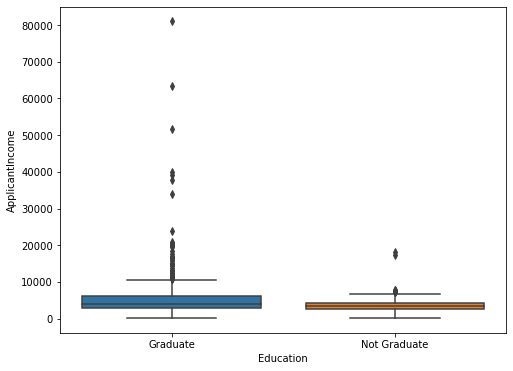

In [74]:
data = df[['ApplicantIncome', 'Education']]
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='Education', y='ApplicantIncome', data=data)

Look at the histogram and boxplot of LoanAmount

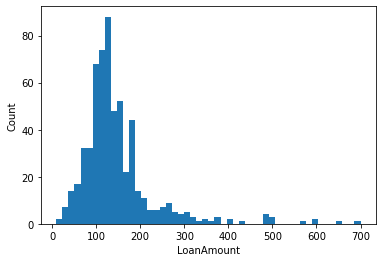

In [81]:
plt.hist(df['LoanAmount'], bins=50)
plt.xlabel('LoanAmount')
plt.ylabel('Count')
plt.show()

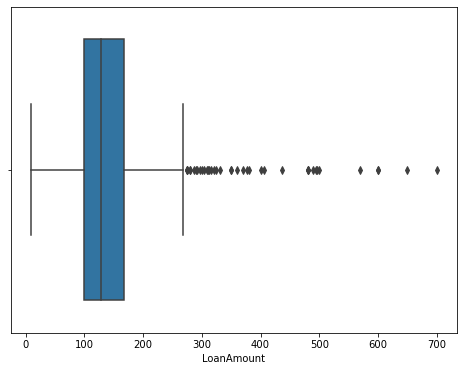

In [78]:
f, ax = plt.subplots(figsize=(8,6))
ax = sns.boxplot(x=df['LoanAmount'])

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [85]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [86]:
# come back to this if time permitting

In [ ]:
# definitely work on this when coming back to project

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [87]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [88]:
df_clean = df.copy()

In [94]:
Loan_0 = df['Loan_Amount_Term'] < 60 # there are no Loan_Amount_Term at 0, no need to worry about that
df_clean[Loan_0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
262,LP001870,Female,No,1,Graduate,No,3481,0.0,155.0,36.0,1.0,Semiurban,N
497,LP002588,Male,Yes,0,Graduate,No,4625,2857.0,111.0,12.0,NaN,Urban,Y
546,LP002768,Male,No,0,Not Graduate,No,3358,0.0,80.0,36.0,1.0,Semiurban,N


In [96]:
# replace categorical missing values with a new value, 'Unknown'. For Pipeline, will need to do FunctionTransformer or ColumnTransformer?
cat_missing = ['Gender', 'Married', 'Dependents', 'Self_Employed']
df_clean[cat_missing]=df_clean[cat_missing].fillna('Unknown')

In [ ]:
# now need to replace missing value in LoanAmount, Loan_Amount_Term, and Credit_History
# mean does not seem Appropriate as there are a lot of extreme values, mode and median might be better

In [101]:
# for Pipeline using SimpleImputer, this can be down in 1 line using strategy='median'
num_missing = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
df_clean['LoanAmount'] = df_clean['LoanAmount'].fillna(df_clean['LoanAmount'].median())
df_clean['Loan_Amount_Term'] = df_clean['Loan_Amount_Term'].fillna(df_clean['Loan_Amount_Term'].median())
df_clean['Credit_History'] = df_clean['Credit_History'].fillna(df_clean['Credit_History'].median())

In [102]:
df_clean.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [ ]:
# ApplicantIncome and LoanAmount have extreme values, should transform these two

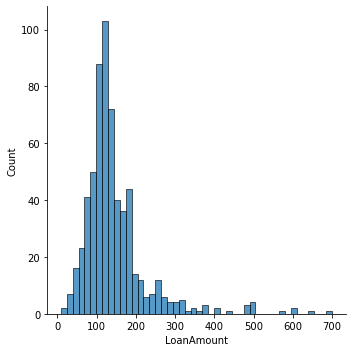

In [103]:
sns.displot(df_clean['LoanAmount'])

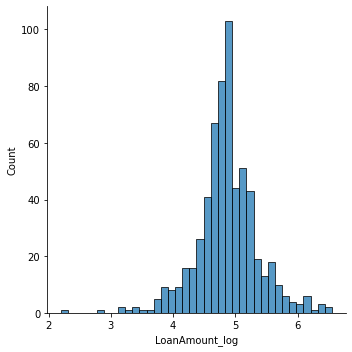

In [105]:
df_clean['LoanAmount_log'] = df_clean['LoanAmount'].apply(np.log)  # will need ColumnTransformer for Pipeline, or scaler?
sns.displot(df_clean['LoanAmount_log'])

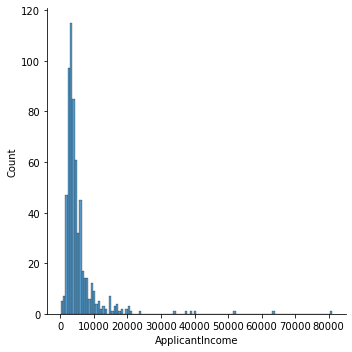

In [106]:
sns.displot(df_clean['ApplicantIncome'])

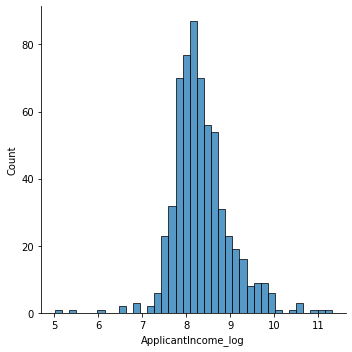

In [107]:
df_clean['ApplicantIncome_log'] = df_clean['ApplicantIncome'].apply(np.log) 
sns.displot(df_clean['ApplicantIncome_log'])

## 4. Feature Engineering
Combine both incomes as total income and take a log transformation of the same.

In [109]:
df_clean['TotalIncome_log'] = (df_clean['ApplicantIncome'] + df_clean['CoapplicantIncome']).apply(np.log)

In [110]:
df_clean.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,8.674026,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,8.430109,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,8.006368,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,7.856707,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,8.699515,8.699515


In [111]:
# loan amount/loan_amount_term ratio
df_clean['LoanAmountTerm_ratio'] = df_clean['LoanAmount'] / df_clean['Loan_Amount_Term']

In [114]:
# loan amount/total_income ratio
df_clean['LoanAmountIncome_ratio'] = df_clean['LoanAmount'] / (df_clean['ApplicantIncome'] + df_clean['CoapplicantIncome'])

In [115]:
df_clean.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,TotalIncome_log,LoanAmountTerm_ratio,LoanAmountIncome_ratio
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,4.852030,8.674026,8.674026,0.355556,0.021884
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030,8.430109,8.714568,0.355556,0.021015
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655,8.006368,8.006368,0.183333,0.022000
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492,7.856707,8.505323,0.333333,0.024287
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760,8.699515,8.699515,0.391667,0.023500


## Transformation & feature selection

### Select KBest

In [2]:
from sklearn.feature_selection import SelectKBest

In [123]:
num_feats = df_clean.dtypes[df_clean.dtypes != 'object'].index.tolist()

In [124]:
kbest = SelectKBest(k=4)

In [157]:
best_4 = kbest.fit_transform(df_clean[num_feats], df_clean['Loan_Status']) # combine this with best PCA components
df_kbest = pd.DataFrame(best_4)
df_kbest

,0,1,2,3
0,0.0,1.0,4.852030,0.021884
1,1508.0,1.0,4.852030,0.021015
2,0.0,1.0,4.189655,0.022000
3,2358.0,1.0,4.787492,0.024287
4,0.0,1.0,4.948760,0.023500
...,...,...,...,...
609,0.0,1.0,4.262680,0.024483
610,0.0,1.0,3.688879,0.009742
611,240.0,1.0,5.533389,0.030438
612,0.0,1.0,5.231109,0.024660


### Hot encoding

In [3]:
from sklearn.preprocessing import OneHotEncoder

In [127]:
cat_feats = df_clean.dtypes[df_clean.dtypes == 'object'].index.tolist()

In [132]:
df_encoding = df_clean[cat_feats].drop(columns=['Loan_Status', 'Loan_ID'])
df_encoding.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [137]:
encoder = OneHotEncoder(sparse=False)
array = np.array(df_encoding)
array

array([['Male', 'No', '0', 'Graduate', 'No', 'Urban'],
       ['Male', 'Yes', '1', 'Graduate', 'No', 'Rural'],
       ['Male', 'Yes', '0', 'Graduate', 'Yes', 'Urban'],
       ...,
       ['Male', 'Yes', '1', 'Graduate', 'No', 'Urban'],
       ['Male', 'Yes', '2', 'Graduate', 'No', 'Urban'],
       ['Female', 'No', '0', 'Graduate', 'Yes', 'Semiurban']],
      dtype=object)

In [143]:
encoded_cat = encoder.fit_transform(array)
encoded_cat

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [144]:
encoded_cat.shape

(614, 19)

### To dense

In [4]:
import scipy

In [ ]:
# no need

### PCA

In [5]:
from sklearn.decomposition import PCA

In [145]:
pca = PCA()
components = pca.fit_transform(encoded_cat)

In [151]:
variance = pca.explained_variance_ratio_
labels = ['PC' + str(x) for x in range(1, len(variance)+1)]
variance

array([2.21374387e-01, 1.35784183e-01, 1.27771080e-01, 1.13077966e-01,
       1.01148750e-01, 8.30624476e-02, 7.44714027e-02, 5.88330578e-02,
       3.53206138e-02, 2.50600320e-02, 1.14373390e-02, 1.06459314e-02,
       2.01280825e-03, 2.39054814e-32, 4.22251320e-33, 3.17405691e-33,
       2.19146114e-33, 1.75665909e-33, 1.31387771e-33])

### Skree plot

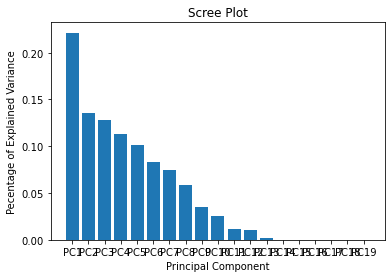

In [152]:
# using scree plot to find optimal components to keep, using elbow rule. Will keep 5 PC component
plt.bar(x=range(1, len(variance)+1), height=variance, tick_label=labels)
plt.ylabel('Pecentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [153]:
n_components = 5
pca = PCA(n_components=n_components)
components = pca.fit_transform(encoded_cat)

In [154]:
components.shape  # combine this with kbest for model

(614, 5)

In [165]:
df_components = pd.DataFrame(components)
df_components.columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5']
df_components

,pc1,pc2,pc3,pc4,pc5
0,0.810966,-0.424835,-0.808075,0.059784,-0.498042
1,-0.763425,-0.152675,-0.089053,-0.475760,0.563703
2,-0.307034,-0.167302,-0.792455,-0.013549,0.227769
3,-0.386248,-0.945247,0.161827,0.592635,-0.860860
4,0.810966,-0.424835,-0.808075,0.059784,-0.498042
...,...,...,...,...,...
609,1.433900,-0.251019,-0.005373,-0.463974,0.502433
610,-0.723094,-0.241807,0.019506,-0.681840,0.380079
611,-0.793612,-0.010533,-0.880143,0.438550,-0.042657
612,-0.877730,-0.066572,-0.813803,0.294746,-0.145840


## 5. Building a Predictive Model

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [337]:
df_for_model = df_kbest.join(df_components, how='left')
X = df_for_model
y = df['Loan_Status']
clf = RandomForestClassifier()
print(X.shape)
print(y.shape)

(614, 9)
(614,)


In [351]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [339]:
# pred
y_pred = clf.predict(X_test)

In [7]:
# eval
from sklearn.metrics import roc_auc_score, confusion_matrix

In [340]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[15, 21],
       [ 8, 79]])

In [358]:
y_pred_proba = clf.predict_proba(X_test)[::, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f'roc_auc_score: {auc}')
accuracy = accuracy_score(y_test, y_pred) 
print(f'accuracy: {accuracy}')
# review numbers

roc_auc_score: 0.695242656449553
accuracy: 0.7642276422764228


Try paramater grid search to improve the results

In [8]:
from sklearn.model_selection import GridSearchCV

In [353]:
param_grid = {
    'n_estimators': [5, 10, 30, 50, 100, 150],   
    'max_depth': [2, 3, 4, 5, 8, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)

In [354]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 1050 out of 1050 | elapsed:   27.1s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 8, 10, 15],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [5, 10, 30, 50, 100, 150]},
             verbose=1)

In [355]:
y_pred_tuned = grid.predict(X_test)

In [356]:
cnf_matrix = confusion_matrix(y_test, y_pred_tuned)
cnf_matrix

array([[15, 21],
       [ 4, 83]])

In [359]:
y_pred_proba_tuned = grid.predict_proba(X_test)[::, 1]
auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
print(f'roc_auc_score: {auc_tuned}')
accuracy = accuracy_score(y_test, y_pred_tuned) 
print(f'accuracy: {accuracy}')
# review numbers

roc_auc_score: 0.7126436781609194
accuracy: 0.7967479674796748


## 6. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

Will try to mark cells that have code blocks that might need to be defined in the API. Marking will be denoted like this <# needs define>. Will need to review making Flask API, take those <# needs define> with a grain of salt, might not need them

In [9]:
# might have to change my approach a little bit than what I did for data prep stage
# for example, instead of taking log for specific columns, might scale everything
# will be reusing variable names, be careful not to rerun old cells
from sklearn.pipeline import Pipeline, FeatureUnion

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### Splitting categorical and numeric

In [15]:
from sklearn.preprocessing import FunctionTransformer

In [19]:
cat_feats = X.dtypes[X.dtypes == 'object'].index.tolist()   

In [20]:
categorical = RawFeats(cat_feats)
cat_only = categorical.fit_transform(X_train)
cat_only.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
260,Male,Yes,1,Graduate,No,Urban
303,Male,Yes,1,Graduate,No,Urban
407,Female,No,0,Not Graduate,No,Rural
261,Male,No,0,Graduate,No,Semiurban
352,Male,Yes,3+,Graduate,No,Rural


## Categorical pipeline

### Imputing

In [21]:
from sklearn.impute import SimpleImputer       
from sklearn.compose import ColumnTransformer

In [22]:
t_cat = [('cat', SimpleImputer(strategy='constant', fill_value='Unknown'), [i for i in cat_feats])] 
transformer_cat = ColumnTransformer(transformers=t_cat)

In [23]:
# test
pipeline_cat = Pipeline(steps=[('keep_cat', categorical),
                           ('imputer_cat', transformer_cat)])

test01 = pipeline_cat.fit_transform(X_train)
'Unknown' in test01 # if true, then it worked

True

### Hot encode & to dense

In [24]:
encoder = OneHotEncoder()   # could just set sparse=False? is there a need for the extra step?

In [25]:
class ToDenseTransformer():       # needs define
    def transform(self, X, y=None, **fit_params):
        return X.todense()
    
    def fit(self, X, y=None, **fit_params):
        return self

In [26]:
# test
pipeline_cat = Pipeline(steps=[('keep_cat', categorical),
                           ('imputer_cat', transformer_cat),
                           ('encoder', encoder),
                           ('to_dense', ToDenseTransformer())])

test02 = pipeline_cat.fit_transform(X_train)

In [27]:
test02.shape # good

(491, 19)

### PCA

In [56]:
pipeline_2 = Pipeline(steps=[('keep_cat', categorical),
                           ('imputer_cat', transformer_cat),
                           ('encoder', encoder),
                           ('to_dense', ToDenseTransformer()),
                           ('pca', PCA(n_components=5))])

test03 = pipeline_2.fit_transform(X_train)

In [57]:
test03.shape  # categorical pipeline completed, moving on to numerical

(491, 5)

## Numerical

In [16]:
num_feats = X.dtypes[X.dtypes != 'object'].index.tolist()  

In [17]:
# for pickle:               # needs define
class RawFeats:
    def __init__(self, feats):
        self.feats = feats
        
    def fit(self, X, y=None):
        pass
    
    def transform(self, X, y=None):
        return X[self.feats]
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [28]:
numerical_t = RawFeats(num_feats)
nums_only = numerical_t.fit_transform(X_train)
nums_only.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
260,6083,4250.0,330.0,360.0,NaN
303,1625,1803.0,96.0,360.0,1.0
407,2213,0.0,66.0,360.0,1.0
261,2060,2209.0,134.0,360.0,1.0
352,2666,2083.0,95.0,360.0,1.0


### Imputing

In [29]:
t_num = [('num', SimpleImputer(strategy='median') , [i for i in num_feats])] 
transformer_num = ColumnTransformer(transformers=t_num)

In [30]:
# test
pipeline_num = Pipeline(steps=[('keep_num', numerical_t),
                           ('imputer_num', transformer_num)])

test1 = pipeline_num.fit_transform(X_train)
test1

array([[6.083e+03, 4.250e+03, 3.300e+02, 3.600e+02, 1.000e+00],
       [1.625e+03, 1.803e+03, 9.600e+01, 3.600e+02, 1.000e+00],
       [2.213e+03, 0.000e+00, 6.600e+01, 3.600e+02, 1.000e+00],
       ...,
       [5.285e+03, 1.430e+03, 1.610e+02, 3.600e+02, 0.000e+00],
       [3.692e+03, 0.000e+00, 9.300e+01, 3.600e+02, 1.000e+00],
       [4.095e+03, 3.447e+03, 1.510e+02, 3.600e+02, 1.000e+00]])

### Feature engineering
here's where it might get a little challenging. How do Include feature engineering? Features to add:
* total income
* loan amount / loan term 
* loan amount / total income

In [31]:
num_feats

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [32]:
def FeatureEngineer(array):             # need define + need to create class
    temp_df = pd.DataFrame(array)
    temp_df.columns = num_feats
    temp_df['total_income'] = temp_df['ApplicantIncome'] + temp_df['CoapplicantIncome']
    temp_df['loanAmountTerm_ratio'] = temp_df['LoanAmount'] / temp_df['Loan_Amount_Term']
    temp_df['loanAmountIncome_ratio'] = temp_df['LoanAmount'] / temp_df['total_income']
    return np.array(temp_df)

In [33]:
feat_eng = FunctionTransformer(FeatureEngineer)  

In [33]:
class FeatEngineer:
    def __init__(self, feats):
        self.feats = feats
        
    def fit(self, X, y=None):
        pass
    
    def transform(self, X, y=None):
        temp_df = pd.DataFrame(X)
        # less than optimal solution but has to work for now
        num_feats = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
        temp_df.columns = num_feats
        temp_df['total_income'] = temp_df['ApplicantIncome'] + temp_df['CoapplicantIncome']
        temp_df['loanAmountTerm_ratio'] = temp_df['LoanAmount'] / temp_df['Loan_Amount_Term']
        temp_df['loanAmountIncome_ratio'] = temp_df['LoanAmount'] / temp_df['total_income']
        return np.array(temp_df)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [34]:
feat_engineer = FeatEngineer(num_feats)

### Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
pipeline_num = Pipeline(steps=[('keep_num', numerical_t),
                               ('imputer_num', transformer_num),
                               ('feature_engineer', feat_engineer),
                               ('scaler', StandardScaler())])

test2 = pipeline_num.fit_transform(X_train)
test2.shape

(491, 8)

In [37]:
test2 # success? seems like everything worked

array([[ 0.07539912,  0.82552961,  2.06808886, ...,  0.4413169 ,
         0.79268229,  0.84515861],
       [-0.59826986,  0.04835648, -0.60593405, ..., -0.5422495 ,
        -0.39632707,  0.41616428],
       [-0.50941446, -0.52428069, -0.9487575 , ..., -0.7153173 ,
        -0.54876416,  0.61464204],
       ...,
       [-0.04519035, -0.07010923,  0.13685009, ..., -0.07404056,
        -0.06604669, -0.0233751 ],
       [-0.28591594, -0.52428069, -0.64021639, ..., -0.50464464,
        -0.41157077,  0.10901894],
       [-0.22501675,  0.57049486,  0.02257561, ...,  0.0437595 ,
        -0.11685905, -0.45489108]])

### KBest

In [38]:
pipeline_num = Pipeline(steps=[('keep_num', numerical_t),
                               ('imputer_num', transformer_num),
                               ('feature_engineer', feat_engineer),
                               ('scaler', StandardScaler()),
                               ('kbest', SelectKBest(k=4))])

test3 = pipeline_num.fit_transform(X_train, y_train)
test3.shape # numerical pipeline completed, moving to feature union then modeling

(491, 4)

## Feature Union

In [39]:
combine_numcat = FeatureUnion([
    ('num_pipeline', pipeline_num),
    ('cat_pipeline', pipeline_cat)
])

In [40]:
main_pipe = Pipeline(steps=[
    ('feature_union', combine_numcat),
    ('model', RandomForestClassifier())
])

In [111]:
base_model = main_pipe.fit(X_train, y_train)

In [112]:
y_pred = base_model.predict(X_test)

In [113]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[12, 24],
       [ 6, 81]])

In [114]:
y_pred_proba = base_model.predict_proba(X_test)[::, 1]
auc = roc_auc_score(y_test, y_pred_proba)
auc # slightly worse than my initial base model, maybe due to the scaling difference? It is the main difference between pipe and first model
# review numbers

0.683109833971903

In [115]:
accuracy = accuracy_score(y_test, y_pred) 
print(accuracy)
# review numbers

0.7560975609756098


## GridSearch

In [41]:
main_pipe = Pipeline(steps=[
    ('feature_union', combine_numcat),
    ('classifier', RandomForestClassifier())])
    
params = {'classifier__n_estimators': [5,10,30,50,100,150],
          'classifier__max_depth': [2,3,4,5,10],
          'classifier__min_samples_leaf': [1,2,3,4,5],
          'classifier__max_features': [4,5,6,7,8,9]
         }

In [42]:
grid = GridSearchCV(main_pipe, params, cv=5, verbose=1, n_jobs=-1)

In [51]:
tuned_model_final= grid.fit(X_train, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:  2.7min finished


# Evalution of final model

In [76]:
y_pred_tuned = tuned_model_final.predict(X_test)

In [53]:
cnf_matrix = confusion_matrix(y_test, y_pred_tuned)
cnf_matrix

array([[13, 23],
       [ 2, 85]])

In [77]:
y_pred_proba_tuned = tuned_model_final.predict_proba(X_test)[::, 1]
auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)
auc_tuned # couldn't get the same results or better than saw before, the scaling must've had an impact. Or is it due to chance? 
# review numbers
# add the curve, auc score alone is not useful

0.6853448275862069

In [55]:
from sklearn.metrics import recall_score, precision_score, accuracy_score # can look at performance through this too

In [78]:
accuracy = accuracy_score(y_test, y_pred_tuned) 
print(accuracy)
# review numbers

0.7967479674796748


## Model persistence

In [57]:
import pickle

In [74]:
# having a hard time with pickle
# it seems there's an error when modifying classes, the cells following "6. Using Pipeline" need to be run in right order
# the class RawFeat needs to run, and it is later. Might need to modifying order of cells so that things go smoother
filename = 'projectIV_model.sav'
pickle.dump(tuned_model_final, open(filename, 'wb'))

In [59]:
pickle_loaded = pickle.load(open(filename, 'rb'))

In [60]:
pickle_pred = pickle_loaded.predict(X_test)
accuracy = accuracy_score(y_test, pickle_pred) 
print(accuracy) # pickle model working

0.7967479674796748


## 7. Deploy your model to cloud and test it with PostMan, BASH or Python
testing locally, then deployed

## Locally

In [61]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [73]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [62]:
X.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [70]:
json_data = {'Gender': 'Male',
       'Married': 'No',
       'Dependents': '0',
       'Education': 'Graduate',
       'Self_Employed': 'No',
       'ApplicantIncome': 5849,
       'CoapplicantIncome': 0.0,
       'LoanAmount': np.nan,
       'Loan_Amount_Term': 360.0,
       'Credit_History': 1.0,
       'Property_Area': 'Urban'}

In [64]:
import requests

In [65]:
URL = "http://127.0.0.1:5000/scoring"

In [71]:
r = requests.post(url = URL, json = json_data)

In [72]:
print(r.json()) # success

[[0.21680302500238235, 0.7831969749976181]]


## Remote